# 日経平均株価 月足 メディアン統計

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import datetime

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import yfinance as yf

from funcs.technical import calc_robust_bollinger

In [3]:
code = 'N225'
symbol = '^%s' % code
ticker = yf.Ticker(symbol)

In [4]:
# 週足で過去全てのデータを取得
df0 = ticker.history(period='max', interval='1mo')

# ローソク足のチャートには、そのうち過去 10 年分のみ使用する
dt_last = df0.index[len(df0) - 1]
tdelta_3y =  datetime.timedelta(days=365 * 10)
df = df0[df0.index >= dt_last - tdelta_3y]
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-07-01 00:00:00+09:00,20291.050781,20850.000000,19115.199219,20585.240234,3318200000,0.0,0.0
2015-08-01 00:00:00+09:00,20540.210938,20946.929688,17714.300781,18890.480469,3723100000,0.0,0.0
2015-09-01 00:00:00+09:00,18763.720703,18777.470703,16901.490234,17388.150391,3132300000,0.0,0.0
2015-10-01 00:00:00+09:00,17479.970703,19202.339844,17389.570312,19083.099609,2979600000,0.0,0.0
2015-11-01 00:00:00+09:00,18827.109375,19994.050781,18641.220703,19747.470703,2559500000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-01 00:00:00+09:00,38932.660156,39581.468750,36840.121094,37155.500000,2515300000,0.0,0.0
2025-03-01 00:00:00+09:00,37617.500000,38220.691406,35541.718750,35617.558594,2625600000,0.0,0.0
2025-04-01 00:00:00+09:00,35961.191406,36075.261719,30792.740234,36045.378906,3179700000,0.0,0.0


## Moving Median

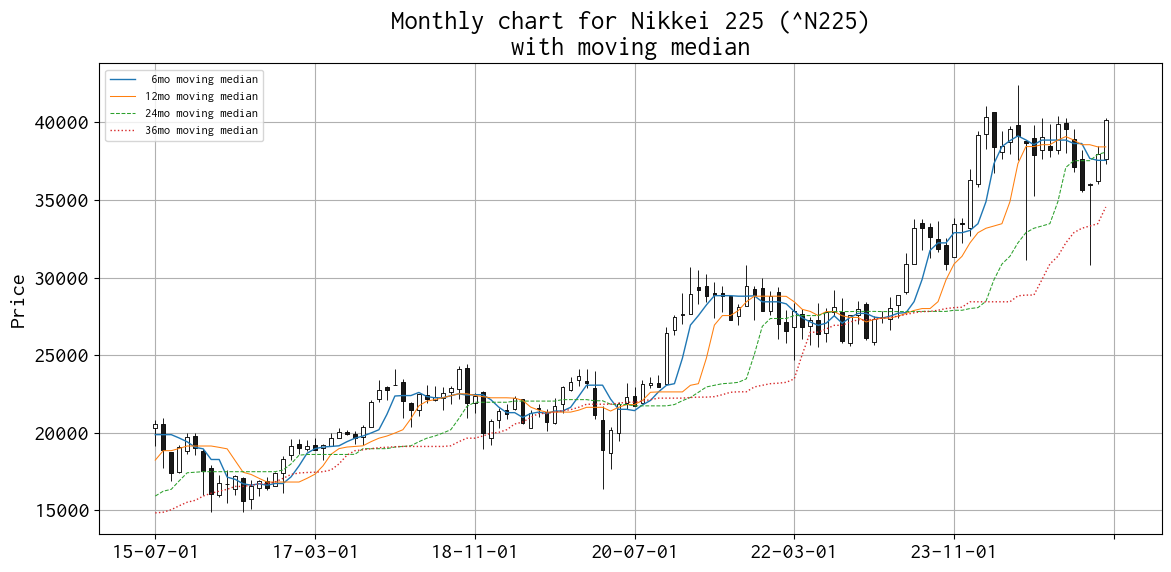

In [5]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 6))

mm06 = df0['Close'].rolling(6).median()
mm12 = df0['Close'].rolling(12).median()
mm24 = df0['Close'].rolling(24).median()
mm36 = df0['Close'].rolling(36).median()

apds  = [
    mpf.make_addplot(mm06[df.index], width=1, label=' 6mo moving median', ax=ax),
    mpf.make_addplot(mm12[df.index], width=0.75, label='12mo moving median', ax=ax),
    mpf.make_addplot(mm24[df.index], width=0.75, linestyle='dashed', label='24mo moving median', ax=ax),
    mpf.make_addplot(mm36[df.index], width=1, linestyle='dotted', label='36mo moving median', ax=ax),
]   

mpf.plot(df, type='candle', style='default', datetime_format='%y-%m-%d', addplot=apds, xrotation=0, ax=ax)

ax.set_title('Monthly chart for %s (%s)\nwith moving median' %(ticker.info['longName'], symbol))
ax.legend(loc='upper left', fontsize=9)
ax.grid()

plt.tight_layout()
plt.savefig('report_monthly_chart_median_%s.png' % code)
plt.show()

In [6]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-05-01 00:00:00+09:00,36197.039062,38494.058594,36040.050781,37965.101562,2710000000,0.0,0.0
2025-06-01 00:00:00+09:00,37651.179688,40267.839844,37320.718750,40150.789062,2257200000,0.0,0.0


In [7]:
df.tail(2)['Close']

Date
2025-05-01 00:00:00+09:00    37965.101562
2025-06-01 00:00:00+09:00    40150.789062
Name: Close, dtype: float64

In [8]:
df.tail(2)['Close'].diff()

Date
2025-05-01 00:00:00+09:00          NaN
2025-06-01 00:00:00+09:00    2185.6875
Name: Close, dtype: float64

In [9]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-06-01 00:00:00+09:00    2499.609375
dtype: float64

In [10]:
df['Close'].rolling(6).median().tail(10)

Date
2024-09-01 00:00:00+09:00    38567.824219
2024-10-01 00:00:00+09:00    38864.500000
2024-11-01 00:00:00+09:00    38864.500000
2024-12-01 00:00:00+09:00    38864.500000
2025-01-01 00:00:00+09:00    38864.500000
2025-02-01 00:00:00+09:00    38644.640625
2025-03-01 00:00:00+09:00    38644.640625
2025-04-01 00:00:00+09:00    37681.765625
2025-05-01 00:00:00+09:00    37560.300781
2025-06-01 00:00:00+09:00    37560.300781
Name: Close, dtype: float64

In [11]:
df['Close'].rolling(12).median().tail(10)

Date
2024-09-01 00:00:00+09:00    38446.779297
2024-10-01 00:00:00+09:00    38567.824219
2024-11-01 00:00:00+09:00    38567.824219
2024-12-01 00:00:00+09:00    38864.500000
2025-01-01 00:00:00+09:00    39091.535156
2025-02-01 00:00:00+09:00    38864.500000
2025-03-01 00:00:00+09:00    38567.824219
2025-04-01 00:00:00+09:00    38567.824219
2025-05-01 00:00:00+09:00    38427.890625
2025-06-01 00:00:00+09:00    38427.890625
Name: Close, dtype: float64

In [12]:
df['Close'].rolling(36).median().tail(10)

Date
2024-09-01 00:00:00+09:00    28874.564453
2024-10-01 00:00:00+09:00    29857.644531
2024-11-01 00:00:00+09:00    30873.365234
2024-12-01 00:00:00+09:00    31372.750000
2025-01-01 00:00:00+09:00    32238.479492
2025-02-01 00:00:00+09:00    32895.779297
2025-03-01 00:00:00+09:00    33180.628906
2025-04-01 00:00:00+09:00    33326.605469
2025-05-01 00:00:00+09:00    33475.531250
2025-06-01 00:00:00+09:00    34552.224609
Name: Close, dtype: float64

## Robust Bollinger bands

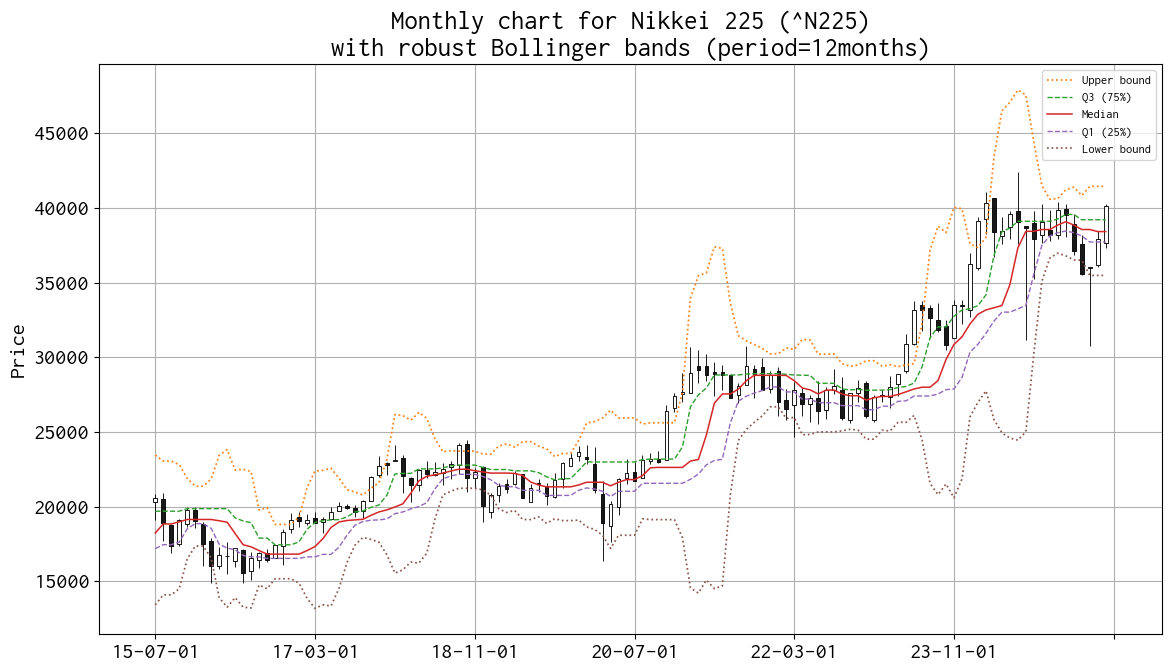

In [13]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 7))

# Bollinger bands
period = 12
mv_median = df0['Close'].rolling(period).median()
mv_q1 = df0['Close'].rolling(period).quantile(.25)
mv_q3 = df0['Close'].rolling(period).quantile(.75)
mv_iqr = mv_q3 - mv_q1
mv_lower = mv_q1 - mv_iqr * 1.5
mv_upper = mv_q3 + mv_iqr * 1.5

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=1.1, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]

mpf.plot(df, type='candle', style='default', addplot=apds, datetime_format='%y-%m-%d', xrotation=0, ax=ax)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Monthly chart for %s (%s)\nwith robust Bollinger bands (period=%dmonths)' % (ticker.info['longName'], symbol, period))
except KeyError:
    ax.set_title('Monthly chart for %s\nwith robust Bollinger bands (period=%smonths)' % (symbol, period))

plt.tight_layout()
plt.savefig('report_monthly_chart_bollinger_robust_%s.png' % code)
plt.show()

## ヒストグラムと Q-Q プロット

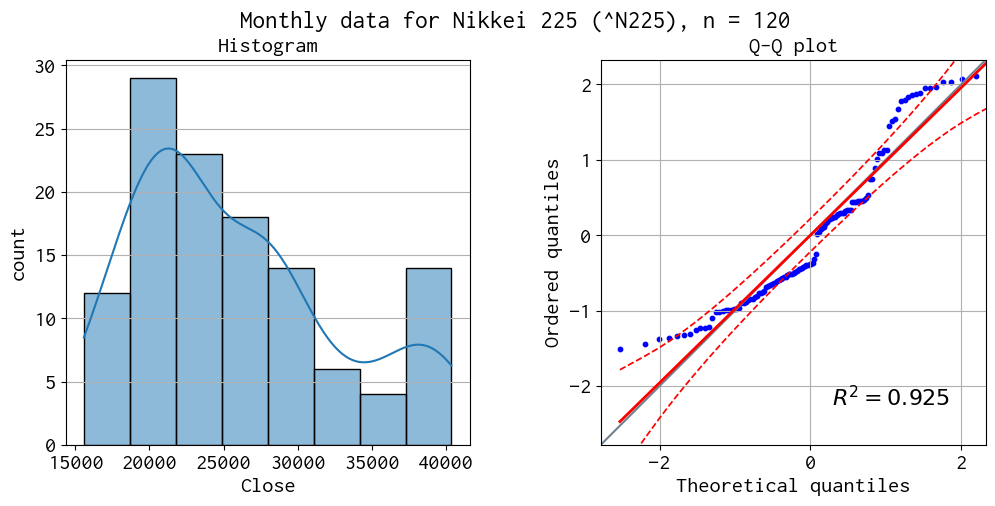

In [14]:
plt.rcParams['font.size'] = 16
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(
    df['Close'],
    kde=True,
    ax=axes[0]
)

# ヒストグラム
axes[0].set_xlabel("Close")
axes[0].set_ylabel("count")
axes[0].grid(axis = 'y')
axes[0].set_title('Histogram', fontsize=16)

# Q-Q プロット
pg.qqplot(df['Close'], s=10,  ax=axes[1])
axes[1].set_title('Q-Q plot', fontsize=16)
axes[1].grid()

plt.suptitle('Monthly data for %s (%s), n = %d' % (ticker.info['longName'], symbol, len(df)), fontsize=18)
plt.subplots_adjust(wspace=0.3)
plt.savefig('report_monthly_histogram_qqplot_%s.png' % code)
plt.show()